In [1]:
import numpy as np
import pandas as pd
from pydataset import data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score


In [2]:
# %matplotlib notebook

## One variable linear regression

In [3]:
df = pd.read_csv('./weatherHistory.csv')

In [4]:
# cheking the data, getting rid of bad data
# df.keys()
df = df.rename(columns=lambda x: x.replace(' ', '_'))
print(df.keys())
df.drop('Loud_Cover', axis=1, inplace=True)
print(df.keys())

Index(['Formatted_Date', 'Summary', 'Precip_Type', 'Temperature_(C)',
       'Apparent_Temperature_(C)', 'Humidity', 'Wind_Speed_(km/h)',
       'Wind_Bearing_(degrees)', 'Visibility_(km)', 'Loud_Cover',
       'Pressure_(millibars)', 'Daily_Summary'],
      dtype='object')
Index(['Formatted_Date', 'Summary', 'Precip_Type', 'Temperature_(C)',
       'Apparent_Temperature_(C)', 'Humidity', 'Wind_Speed_(km/h)',
       'Wind_Bearing_(degrees)', 'Visibility_(km)', 'Pressure_(millibars)',
       'Daily_Summary'],
      dtype='object')


In [5]:
# Get the indexes where 'Visibility_(km)' is greater than 10
indexes_greater_than = df[df['Visibility_(km)'] > 10].index
# Filter 'Humidity' column by removing indexes greater than 'indexes_greater_than'
filtered_humidity = df['Humidity'].drop(indexes_greater_than)
# Filter the original DataFrame by removing indexes greater than 'indexes_greater_than'
df = df.drop(indexes_greater_than)

In [6]:
df.head()

,Formatted_Date,Summary,Precip_Type,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility_(km),Pressure_(millibars),Daily_Summary
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.982,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.982,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.982,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.982,1017.22,Partly cloudy throughout the day.
21,2006-04-01 21:00:00.000 +0200,Mostly Cloudy,rain,11.183333,11.183333,0.76,4.9266,160.0,9.982,1015.77,Partly cloudy throughout the day.


In [35]:
#printing Precip_Type and Summary unique description
print(set(df['Precip_Type']), set(df['Summary']))
#calculatiing number of rows with rain and snow 
precip_counts = df['Precip_Type'].value_counts()
print(precip_counts)
print('______________________')
nan_count = df['Precip_Type'].isna().sum()
print("Number of NaN values in 'Precip_Type' column:", nan_count)

{nan, 'rain', 'snow'} {'Breezy and Foggy', 'Drizzle', 'Breezy and Mostly Cloudy', 'Breezy and Overcast', 'Windy and Overcast', 'Overcast', 'Foggy', 'Windy and Mostly Cloudy', 'Windy and Partly Cloudy', 'Dry', 'Clear', 'Mostly Cloudy', 'Partly Cloudy', 'Humid and Partly Cloudy', 'Breezy and Partly Cloudy', 'Light Rain', 'Rain', 'Windy', 'Windy and Foggy', 'Humid and Mostly Cloudy', 'Breezy', 'Dry and Partly Cloudy', 'Humid and Overcast'}
rain    8154
snow    1774
Name: Precip_Type, dtype: int64
______________________
Number of NaN values in 'Precip_Type' column: 72


In [8]:
#randomly selectiong 10000 rows out of all dataest
df = df.sample(n=10000)

/Applications/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1010: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


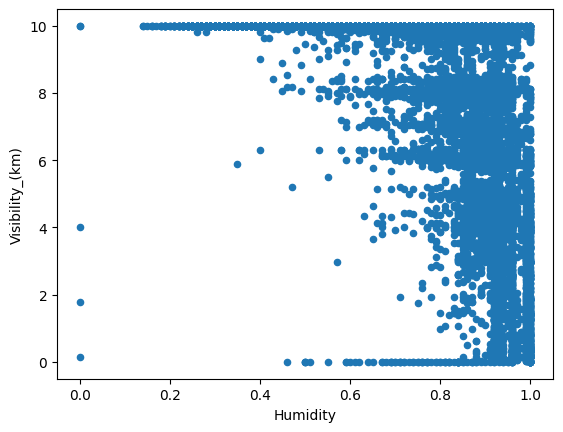

In [9]:
df.plot(x='Humidity', y='Visibility_(km)', kind='scatter')
plt.show()

In [10]:

# Split the DataFrame into X and y for Humidity and Visibility_(km) respectively.
X = df['Humidity']
y = df['Visibility_(km)']
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

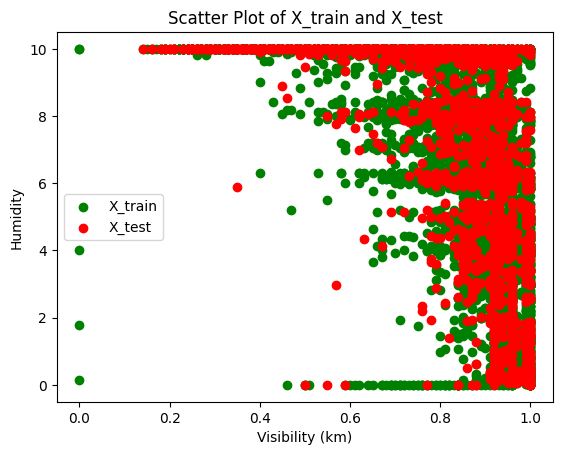

In [11]:
# Plotting X_train
plt.scatter(X_train, y_train, color='g', label='X_train')
# Plotting X_test
plt.scatter(X_test, y_test, color='r', label='X_test')
plt.xlabel('Visibility (km)')
plt.ylabel('Humidity')
plt.title('Scatter Plot of X_train and X_test')
plt.legend()
plt.show()


In [12]:
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

In [13]:
prediction = LR.predict(X_test.values.reshape(-1,1))

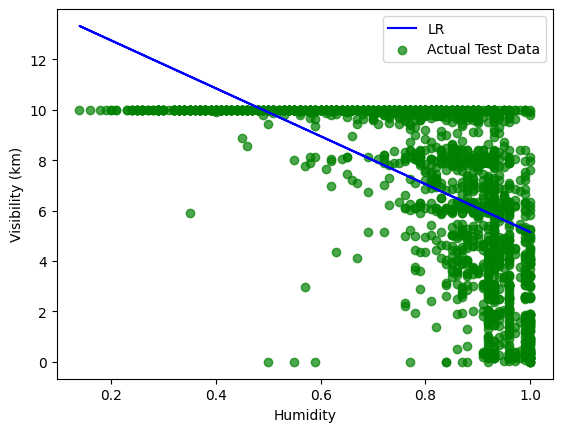

In [14]:
# plot data
plt.plot(X_test, prediction, label = 'LR', color = 'b')
plt.scatter(X_test, y_test, label = 'Actual Test Data', color = 'g', alpha = 0.7)
plt.legend()
plt.ylabel('Visibility (km)')
plt.xlabel('Humidity')
plt.show()


In [15]:
LR.predict([[0.9]])

array([6.09746761])

In [16]:
LR.score(X_train.values.reshape(-1,1), y_train.values)

0.3454794063497457

In [17]:
LR.coef_

array([-9.51133129])

### Lets see if Multi variable linear regression gives better prediction

In [19]:
df['Rain'] = df['Precip_Type'].apply(lambda x: 1 if x in ['rain', 'snow'] else 0)
# It apperat most of the days are with rain in current dataset, so we will abandon percipation and pick something else.

In [20]:
df['Pressure_(millibars)'].head()


7984     1015.38
17646    1014.37
19612    1011.56
27924    1021.50
77012    1019.84
Name: Pressure_(millibars), dtype: float64

In [21]:
import seaborn as sns

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
# Select the columns to be scaled
columns_to_scale = ['Humidity', 'Temperature_(C)', 'Wind_Speed_(km/h)']
# Create an instance of StandardScaler
scaler = StandardScaler()
# Fit the scaler to the data and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


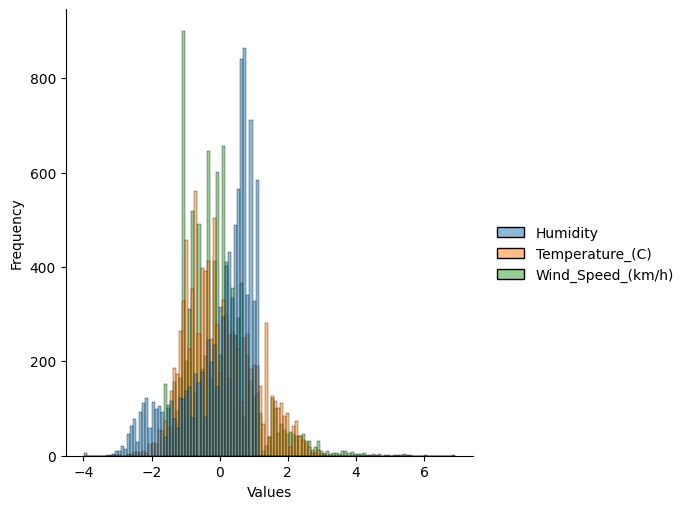

In [24]:
# Select the columns for plotting
columns = ['Humidity', 'Temperature_(C)', 'Wind_Speed_(km/h)']
# Plot histograms
sns.displot(data=df[columns], kde=False)
# Set x-axis label
plt.xlabel('Values')
# Set y-axis label
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [25]:
# df.keys()
# df.head()
# df = df.drop(['Summary', 'Precip_Type','Daily_Summary', 'Rain' ],axis = 1)
df.shape

(10000, 12)

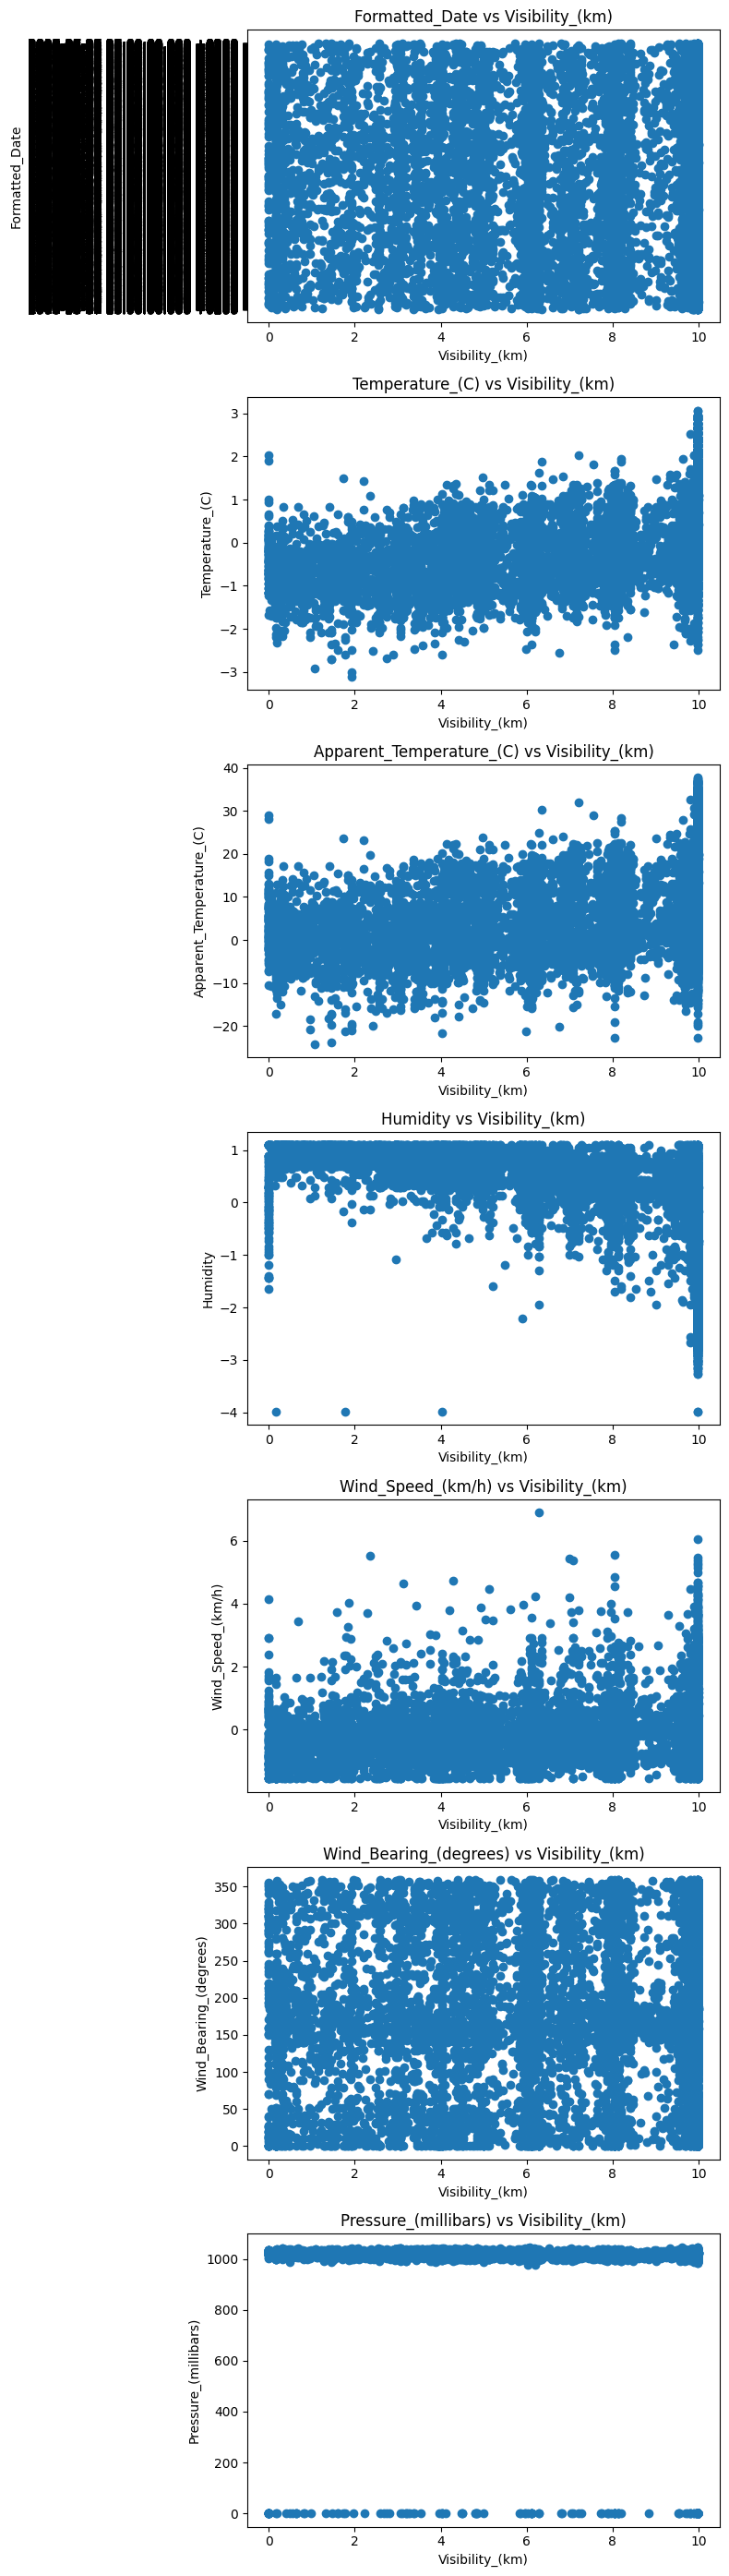

In [26]:
# Get the columns to plot against 'Visibility_(km)'
columns_to_plot = ['Formatted_Date', 'Temperature_(C)',
                   'Apparent_Temperature_(C)', 'Humidity', 'Wind_Speed_(km/h)',
                   'Wind_Bearing_(degrees)', 'Pressure_(millibars)']
# Create subplots
fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(8, 4 * len(columns_to_plot)))

# Plot each column against 'Visibility_(km)'
for i, column in enumerate(columns_to_plot):
    axes[i].scatter(df['Visibility_(km)'], df[column])
    axes[i].set_xlabel('Visibility_(km)')
    axes[i].set_ylabel(column)
    axes[i].set_title(f'{column} vs Visibility_(km)')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


In [27]:
# Select the columns to be scaled
columns_to_scale = ['Temperature_(C)', 'Apparent_Temperature_(C)', 'Humidity', 'Wind_Speed_(km/h)',
        'Wind_Bearing_(degrees)', 'Pressure_(millibars)']
# Create an instance of StandardScaler
scaler = StandardScaler()
# Fit the scaler to the data and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [28]:

# Split the DataFrame into X and y
X = df[['Temperature_(C)', 'Humidity', 'Wind_Speed_(km/h)', 'Pressure_(millibars)']]  # Features
y = df['Visibility_(km)']  # Target variable

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
print(X_train.shape, y_train.shape)

(7000, 4) (7000,)


In [30]:
MR = LinearRegression()
MR.fit(X_train.values, y_train.values)

LinearRegression()

In [31]:
MR.score(X_train.values, y_train.values)

0.39323126020904586

In [32]:
#cheking coefficients
MR.coef_

array([ 0.80449025, -1.23946662,  0.40040757,  0.11820685])

## with Multi Linear Regression I was able to improve prediction of Visibility in km up to 39.3% from 34.5% with Linear Regression model